Le code source de ce cours est disponible sur https://github.com/asardell/statistique-python

<font size="6">  Test d'indépendance 🎲 </font>

Les tests d'indépendances permettent de définir s'il existe un lien entre deux variables. Il existe différent test d'indépence, en voici quelques exemples :

* Test indépendance entre deux variables quantitatives / Test de corrélation Pearson
* Test d'indépendance entre deux variables qualitatives / Test du Chi²
* Test d'indépendance entre une variable qualitative et une quantitative / Test de Fisher avec l'analyse de la variance (ANOVA)

<br>

Dans une démarche d'un projet de machine learning, les test d'indépendance permettent d'exclure des variables explicatives potentiellement non porteuses d'information.

Librairies utilisées

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler

# Test de corrélation Pearson

L’intérêt des tests de corrélation est d’apporter plus de pertinence et fiabilité aux coefficients de corrélation. Il existe différents test de corrélation, nous utilisons celui de Pearson.

On travaille avec le jeu de données fromage 🧀 disponible en [cliquant ici](https://github.com/asardell/programmation-r/tree/master/dataset)

In [3]:
df = pd.read_table("../Dataset/fromage.txt", index_col=0)
df.head()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
Fromages,,,,,,,,,
CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


Avant de réaliser des tests d'indépendance, on projette graphiquement les données 2 à 2

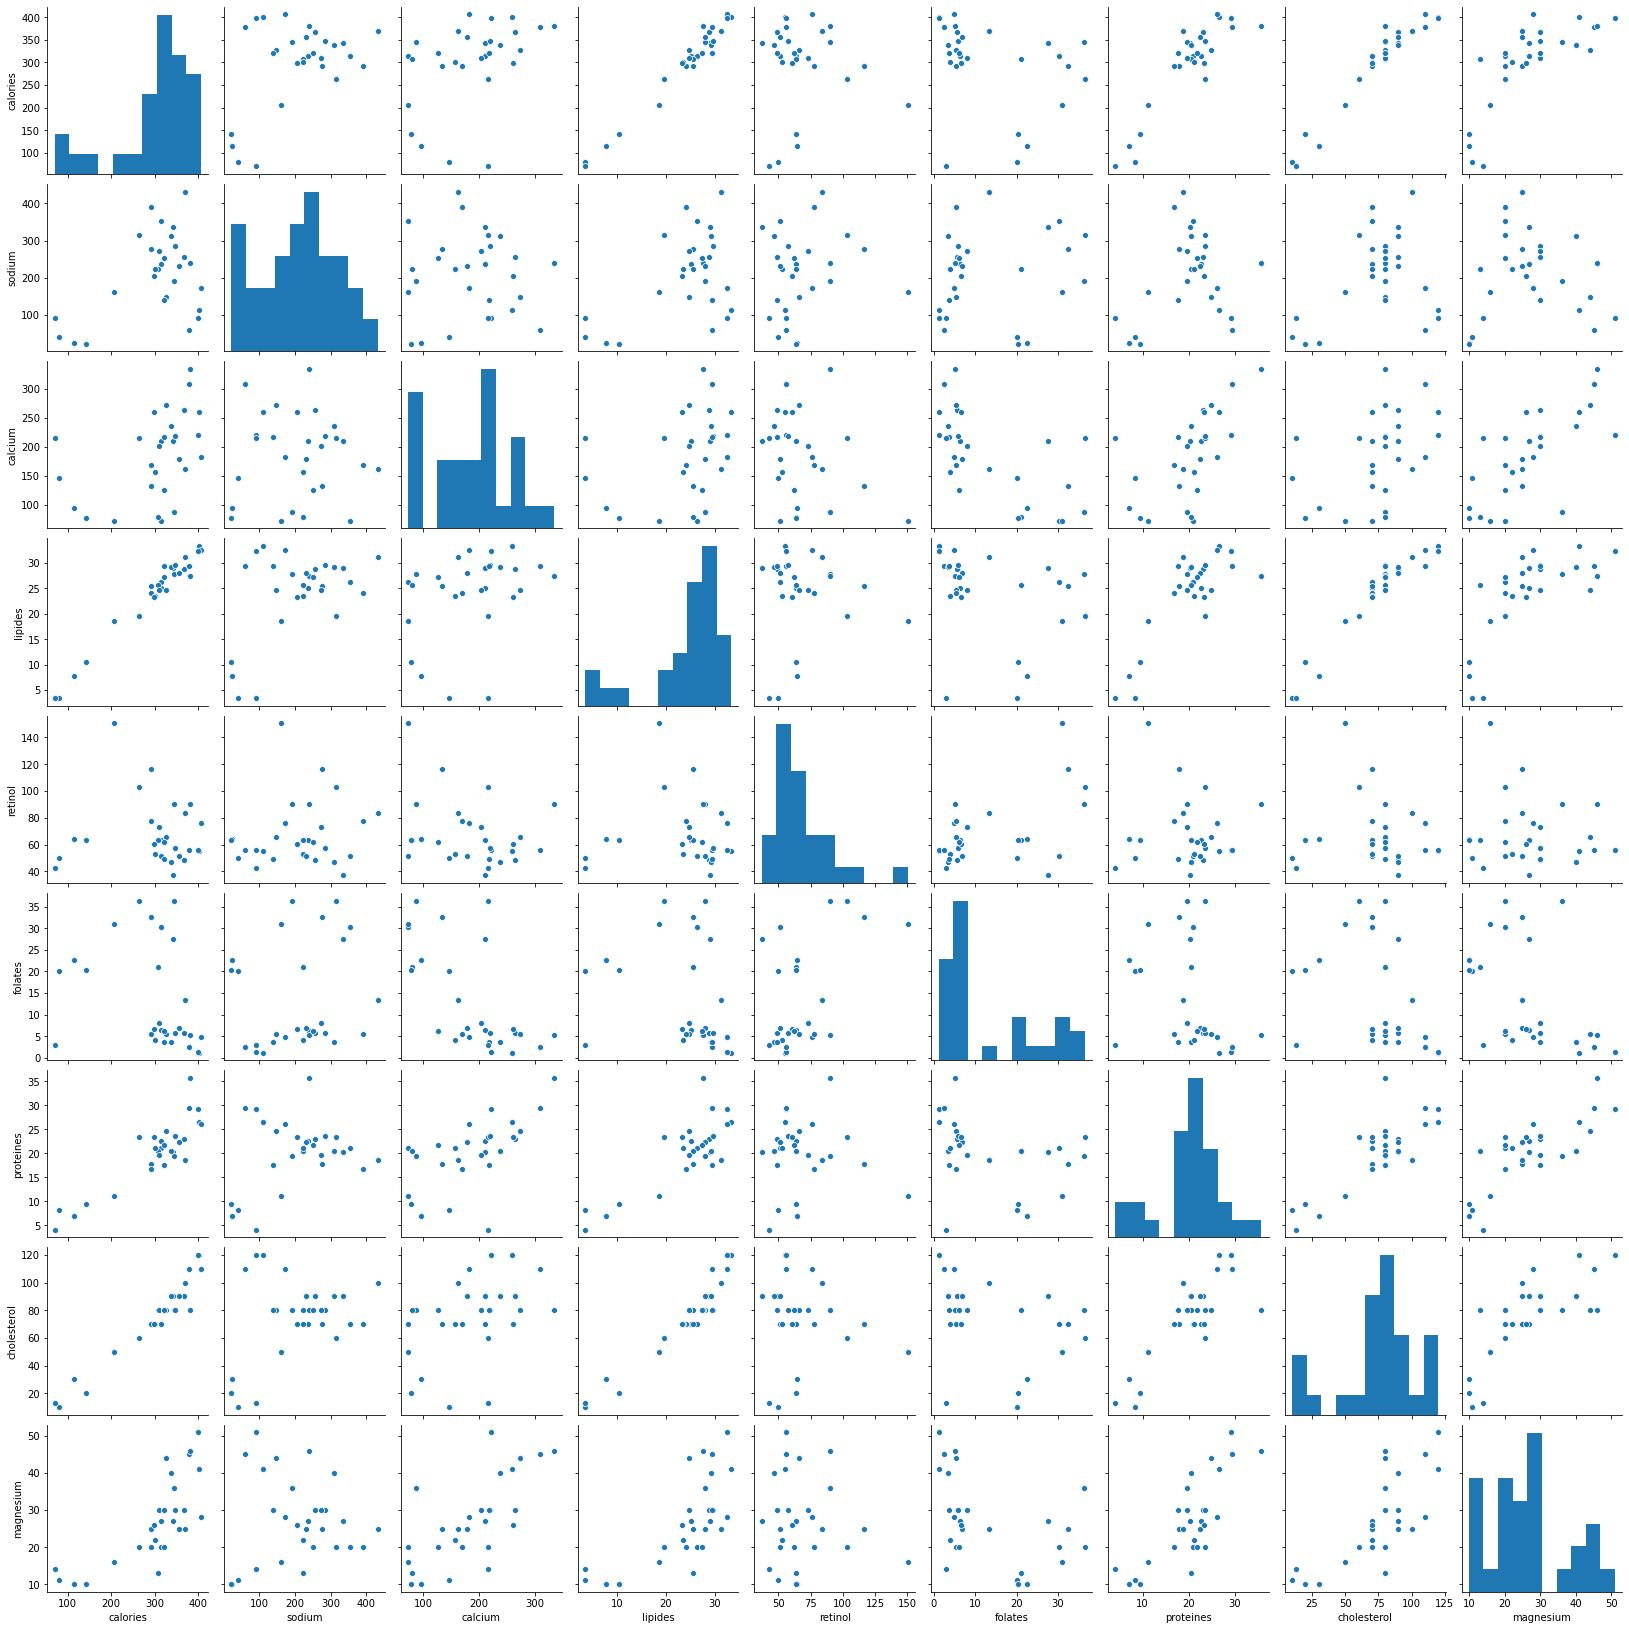

In [3]:
sns.pairplot(df.iloc[:,0:9])

## Matrice des corrélations

Voici la matrice des corrélations des variables du fichier fromage.

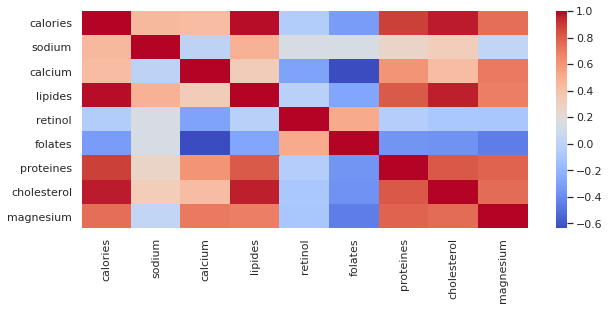

In [4]:
sns.set(rc={'figure.figsize':(10,4)})

df_corr = df.corr()

ax = sns.heatmap(df_corr, xticklabels = df_corr.columns , 
                 yticklabels = df_corr.columns, cmap = 'coolwarm')

L'intérêt des tests de corrélation est d'apporter plus de pertinence et fiabilité aux coefficients de corrélation. Il existe différents test de corrélation, nous utilisons celui de Pearson.

In [5]:
from scipy.stats import pearsonr

On pose les hypothèses de départ :

* H0 : Variables indépendantes si p-value > 5%
* H1 : Variables non indépendantes si p-value < 5%

### Lipides vs Magnesium

La première sortie correspond au coefficient de corrélation, la seconde à la p-value (ou probabilité critique)

In [6]:
pearsonr(df.lipides, df.magnesium)

(0.6898600757996967, 3.4693640122029244e-05)

~H0 : Variables indépendantes si p-value > 5%~
<br> H1 : Variables non indépendantes si p-value < 5%

### Sodium vs Retinol

In [7]:
pearsonr(df.sodium, df.retinol)

(0.14432755157345512, 0.45508547512205944)

H0 : Variables indépendantes si p-value > 5%
<br> ~H1 : Variables non indépendantes si p-value < 5%~ <br>
Si on veut rejeter H0 et prendre H1, j'ai 45,5% de chance de me tromper

📢 Les tests statistiques sont trés sensibles à la taille de l'échantillon. 
Un coefficient de corrélation de 0.14 n'aura pas la même significativité sur un échantillon de 29 fromages qu'un échantillon de 319 fromages avec le même coefficient de corrélation.

On construit un daatframe en duppliquant le nombre de lignes

In [8]:
df_append = df.copy()
df_append.reset_index(inplace=True)
df_append = df_append.append([df_append]*10,ignore_index=True)
df_append.shape

(319, 10)

Chaque fromage apparaît plusieurs fois, on a augmenté la taille de l'échantillon

In [9]:
df_append.Fromages.value_counts().head()

SaintPaulin       11
Cantal            11
Pyrenees          11
Bleu              11
Fr.frais40nat.    11
Name: Fromages, dtype: int64

On effectue un autre test de corrélation avec les mêmes variables sur l'échantillon plus grand.

In [10]:
pearsonr(df_append.sodium, df_append.retinol)

(0.14432755157345512, 0.00984628928803309)

~H0 : Variables indépendantes si p-value > 5%~
<br> H1 : Variables non indépendantes si p-value < 5% <br>

On obtient logiquement le même coefficient de corrélation, mais en revanche, cette fois si la p-value est proche de 0.

###  Matrice des p-values

On effectue un test de corrélation sur chaque variable 2 à 2 en isolant uniquement la p-value

In [7]:
a = np.empty((len(df.columns),len(df.columns),))
a[:] = np.nan
for i in range(0,len(df.columns)):
    for j in range(0,len(df.columns)):
        a[i,j] = pearsonr(df.iloc[:,i], df.iloc[:,j])[1]

df_pvalue = round(pd.DataFrame(a, columns=df.columns, index = df.columns),5)

On affiche la matrice des corrélations avec un gradiant de couleur

In [8]:
cm = sns.light_palette("green", as_cmap=True) 

df_pvalue.\
style.background_gradient(cmap=cm).set_precision(2)

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
calories,0.00,0.01,0.02,0.00,0.83,0.09,0.00,0.00,0.00
sodium,0.01,0.00,0.98,0.01,0.46,0.48,0.15,0.08,0.87
calcium,0.02,0.98,0.00,0.07,0.13,0.00,0.00,0.02,0.00
lipides,0.00,0.01,0.07,0.00,0.92,0.15,0.00,0.00,0.00
retinol,0.83,0.46,0.13,0.92,0.00,0.00,0.84,0.65,0.61
folates,0.09,0.48,0.00,0.15,0.00,0.00,0.06,0.05,0.02
proteines,0.00,0.15,0.00,0.00,0.84,0.06,0.00,0.00,0.00
cholesterol,0.00,0.08,0.02,0.00,0.65,0.05,0.00,0.00,0.00
magnesium,0.00,0.87,0.00,0.00,0.61,0.02,0.00,0.00,0.00


💡 Obtient-on les mêmes p-value si on centre et on réduit ?

On centre et on réduit

In [9]:
from sklearn.preprocessing import StandardScaler
df_CR = StandardScaler().fit_transform(df)
df_CR = pd.DataFrame(df_CR, columns=df.columns)
df_CR.head(3)

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,0.154630,1.342968,-1.587464,0.268066,-0.672290,1.500911,0.121519,-0.165242,-0.626309
1,0.154630,0.261393,0.337679,0.117846,-0.162662,-0.573843,0.355480,-0.165242,0.003101
2,1.117917,-0.918507,1.033649,1.144354,-0.533301,-1.025253,0.940383,1.636269,1.261920


On calcule les test de corrélation

In [10]:
for i in range(0,len(df.columns)):
    for j in range(0,len(df.columns)):
        a[i,j] = pearsonr(df_CR.iloc[:,i], df_CR.iloc[:,j])[1]

df_CR_pvalue = round(pd.DataFrame(a, columns=df.columns, index = df.columns),5)

On affiche la matrice des p-value

In [11]:
cm = sns.light_palette("green", as_cmap=True) 

df_CR_pvalue.\
style.background_gradient(cmap=cm).set_precision(2)

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
calories,0.00,0.01,0.02,0.00,0.83,0.09,0.00,0.00,0.00
sodium,0.01,0.00,0.98,0.01,0.46,0.48,0.15,0.08,0.87
calcium,0.02,0.98,0.00,0.07,0.13,0.00,0.00,0.02,0.00
lipides,0.00,0.01,0.07,0.00,0.92,0.15,0.00,0.00,0.00
retinol,0.83,0.46,0.13,0.92,0.00,0.00,0.84,0.65,0.61
folates,0.09,0.48,0.00,0.15,0.00,0.00,0.06,0.05,0.02
proteines,0.00,0.15,0.00,0.00,0.84,0.06,0.00,0.00,0.00
cholesterol,0.00,0.08,0.02,0.00,0.65,0.05,0.00,0.00,0.00
magnesium,0.00,0.87,0.00,0.00,0.61,0.02,0.00,0.00,0.00


💡 On obtient bien les mêmes p-value si on centre et on réduit

## ⛔ Cas de relation non linéaire

Les différents coefficients de corrélation sont beaucoup plus adaptés aux relation linéaire. C’est pourquoi il est important de toujours visualiser les distributions.

Plus d'infos [ici](http://grasland.script.univ-paris-diderot.fr/STAT98/stat98_6/stat98_6.htm)

In [13]:
from sklearn.datasets import make_regression, make_circles
from scipy.stats import kendalltau, spearmanr

### Cas d'une relation linéaire et monotone

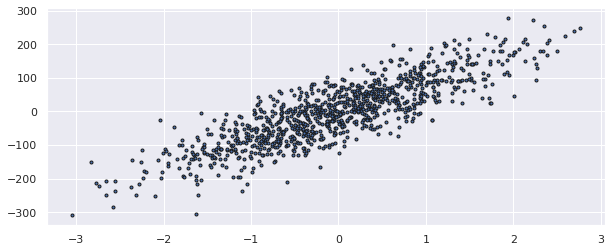

In [14]:
X, y = make_regression(n_samples=1000, n_features=1,
                                      n_informative=1, noise=50, random_state=0)

plt.scatter(X, y, edgecolor='k', marker='.')
x = pd.DataFrame(X, columns = ['x'])
y = pd.DataFrame(y, columns = ['y'])

In [15]:
print("Pearson " + str(pearsonr(x.x, y.y)))
print(kendalltau(x.x, y.y))
print(spearmanr(x.x, y.y))

Pearson (0.8522914621548177, 3.9071630180850793e-283)
KendalltauResult(correlation=0.650034034034034, pvalue=4.861439501214572e-208)
SpearmanrResult(correlation=0.8403487803487804, pvalue=1.1110733387280784e-267)


### Cas d'une relation non-linéaire et non-monotone

La parabole 

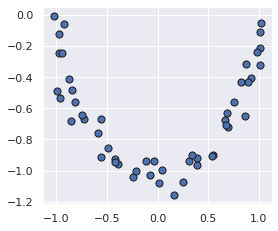

Pearson (0.007375688171047097, 0.9594565841838587)
KendalltauResult(correlation=0.02857142857142857, pvalue=0.7696979437812898)
SpearmanrResult(correlation=0.027130852340936373, pvalue=0.8516401233148823)


In [17]:
X_hyperbole = X[X.y < 0]
fig = plt.figure(figsize=(9, 8))
ax = plt.subplot(221)
ax.scatter(X_hyperbole.x, X_hyperbole.y, s=50, edgecolor='k')
plt.show()

print("Pearson " + str(pearsonr(X_hyperbole.x, X_hyperbole.y)))
print(kendalltau(X_hyperbole.x, X_hyperbole.y))
print(spearmanr(X_hyperbole.x, X_hyperbole.y))

Le cercle

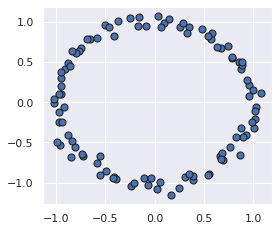

Pearson (-0.002463789884299965, 0.9805908411995362)
KendalltauResult(correlation=-0.0008080808080808082, pvalue=0.9904954511734626)
SpearmanrResult(correlation=0.0065406540654065395, pvalue=0.9485045076254706)


In [16]:
X = make_circles(n_samples=100,factor=0.99, random_state=0, noise=0.05)[0]
X = pd.DataFrame(X, columns=['x','y'])
fig = plt.figure(figsize=(9, 8))
ax = plt.subplot(221)
ax.scatter(X.x, X.y, s=50, edgecolor='k')
plt.show()

print("Pearson " + str(pearsonr(X.x, X.y)))
print(kendalltau(X.x, X.y))
print(spearmanr(X.x, X.y))

# Test du Khi²

L'intérêt du test du Khi² est de mesurer l'indépendance entre deux variables qualitatives à partir du tableau de contigence.

On travaille sur le jeu de données Titanic 🧊⛴ disponible en [cliquant ici]()

In [18]:
df = pd.read_csv("../Dataset/Titanic.csv", index_col=0)
df.head()

,Name,PClass,Age,Sex,Survived,SexCode
1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0


In [20]:
df_count = pd.crosstab(df.Survived, df.PClass)
df_count

PClass,1st,2nd,3rd
Survived,,,
0,129,161,573
1,193,119,138


On pose les hypothèses de départ :

* H0 : Variables indépendantes si p-value > 5%
* H1 : Variables non indépendantes si p-value < 5%

### Survived vs PClass

In [22]:
from scipy.stats import chi2_contingency
Khi2_obs, p_value, ddl, effectif_theorique = chi2_contingency(df_count)

In [23]:
p_value

3.852315502424536e-38

H0 : Variables indépendantes si p-value > 5%
<br> ~H1 : Variables non indépendantes si p-value < 5%~


### Exemple sur données fictives

In [24]:
obs = np.array([[693,886,534,153], [597,696,448,95]])
chi2_contingency(obs)

(6.050399610728231,
 0.1091837556828247,
 3,
 array([[712.61335934, 873.91808874, 542.47001463, 136.9985373 ],
        [577.38664066, 708.08191126, 439.52998537, 111.0014627 ]]))

H0 : Variables indépendantes si p-value > 5%
<br> ~H1 : Variables non indépendantes si p-value < 5%~ <br>
Si on veut rejeter H0 et prendre H1, j'ai 10,9% de chance de me tromper

Le 10,9% correspond à la probabilité de rejeter à tord H0. Comment la calculer ?

 Lecture dans la table du Chi2

In [25]:
from scipy.stats import chi2
J = df = np.arange(1,5,1)
I = np.arange(0.05,0.15,0.005)

a = np.empty((len(J),len(I)))
a[:] = np.nan

for i in range(0,len(I)):
    for j in range(0,len(J)):
        a[j,i] = chi2.isf(I[i], J[j])
        
df_chi2 = round(pd.DataFrame(a, columns=I, index = J),5)
df_chi2

,0.050,0.055,0.060,0.065,0.070,0.075,0.080,0.085,0.090,0.095,0.100,0.105,0.110,0.115,0.120,0.125,0.130,0.135,0.140,0.145
1,3.84146,3.68209,3.53738,3.40498,3.28302,3.17005,3.06490,2.96661,2.87437,2.78754,2.70554,2.62791,2.55422,2.48413,2.41732,2.35353,2.29250,2.23405,2.17796,2.12408
2,5.99146,5.80084,5.62682,5.46674,5.31852,5.18053,5.05146,4.93021,4.81589,4.70776,4.60517,4.50759,4.41455,4.32565,4.24053,4.15888,4.08044,4.00496,3.93223,3.86204
3,7.81473,7.60179,7.40688,7.22713,7.06031,6.90464,6.75869,6.62129,6.49146,6.36839,6.25139,6.13987,6.03333,5.93132,5.83346,5.73941,5.64888,5.56161,5.47734,5.39589
4,9.48773,9.25643,9.04437,8.84849,8.66643,8.49628,8.33653,8.18593,8.04344,7.90818,7.77944,7.65657,7.53904,7.42638,7.31816,7.21405,7.11371,7.01686,6.92325,6.83266


On cherche quelle est la probabilité critique pour laquelle **Khi2_obs** < Khi2_max de la table sur la ligne correspond à notre nombre de degré de liberté **ddl**

### 📢 Taille de l'échantillon

Les tests d'indépendance sont trés sensibles à la taille des échantillons. Ici on divise par 100 pour avoir des effectifs faibles mais en conservant les répartitions.

In [27]:
chi2_contingency(obs/100)

(0.060503996107282396,
 0.996112901286428,
 3,
 array([[7.12613359, 8.73918089, 5.42470015, 1.36998537],
        [5.77386641, 7.08081911, 4.39529985, 1.11001463]]))

H0 : Variables indépendantes si p-value > 5%
<br> ~H1 : Variables non indépendantes si p-value < 5%~ <br>

Ici on multiplie par 100 pour avoir des effectifs grands mais en conservant les répartitions.

In [28]:
chi2_contingency(obs*100)

(605.039961072823,
 8.14310251740213e-131,
 3,
 array([[71261.33593369, 87391.80887372, 54247.0014627 , 13699.85372989],
        [57738.66406631, 70808.19112628, 43952.9985373 , 11100.14627011]]))

~H0 : Variables indépendantes si p-value > 5%~
<br> H1 : Variables non indépendantes si p-value < 5%

# ANOVA

## Anova à 1 facteur

On effectue une analyse de variance pour mesurer l’indépendance entre une variable qualitative et une quantitative.

Exemple sur le dataset Hotdogs 🌭 disponible en [cliquant ici]().

In [56]:
df = pd.read_csv("../Dataset/Hotdogs.csv", sep = ";")
df.head()

,Type,Calories,Sodium
0,Beef,186,495
1,Beef,181,477
2,Beef,176,425
3,Beef,149,322
4,Beef,184,482


In [38]:
df.Type.unique()

array(['Beef', 'Meat', 'Poultry'], dtype=object)

On va tester l’indépendance entre la variable qualitative Type et la variable quantitatives Calories.

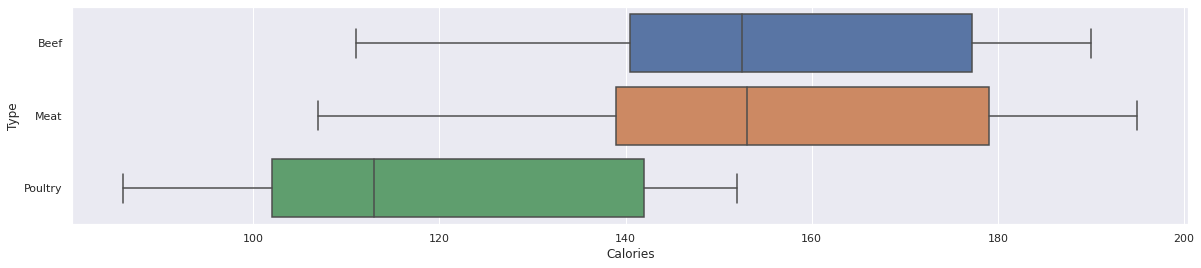

In [39]:
plt.subplots(figsize=(20,4))
ax = sns.boxplot(x="Calories", y="Type", data=df)

Dans une ANOVA, on cherche à déterminer si les moyennes des groupes sont significativement différentes. On pose donc :

* H0 : Les moyennes de chaque groupe sont égales si p-value > 5%
* H1 : Les moyennes de chaque groupe ne sont pas toutes égales si p-value < 5%

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Calories ~ Type', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Type,17692.195098,2.0,16.073993,0.000004
Residual,28067.138235,51.0,NaN,NaN


~H0 : Les moyennes de chaque groupe sont égales si p-value > 5%~
<br> H1 : Les moyennes de chaque groupe ne sont pas toutes égales < 5%

Quand on dispose d’un petit échantillon, la pertinence de ce test repose sur la validation de plusieurs hypothèses :

* l’indépendance entre les échantillons de chaque groupe
* l’égalité des variances que l’on peut verifier avec un test de Bartlett.
* la normalité des résidus avec un test de Shapiro.

### L'indépendance

L’indépendance est une des 3 conditions de validité d’une ANOVA. Seul le contexte de l’étude permet de s’assurer de l’indépendance entre les échantillons de chaque groupe (ici beef, poultry, chicken.)

### L’égalité des variances

On parle aussi d’homoscédasticité. C’est une des 3 conditions de validité d’une ANOVA. On cherche à démontrer que les variances de chaque groupe sont égales. Dans un boxplot, l’amplitude des boîtes traduit graphiquement l’égalité des variances.

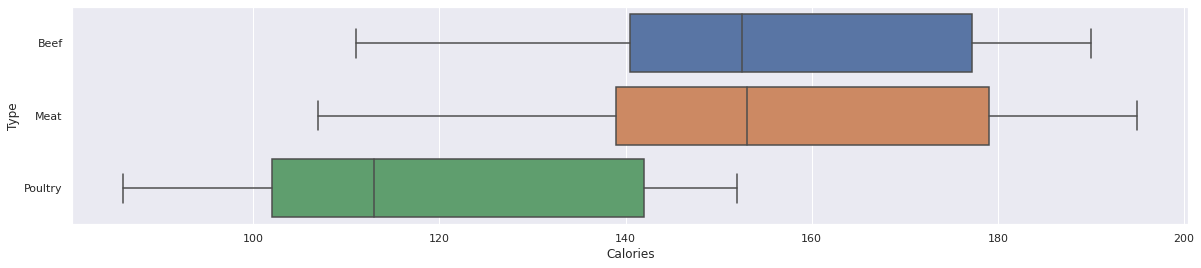

In [57]:
plt.subplots(figsize=(20,4))
ax = sns.boxplot(x="Calories", y="Type", data=df)

In [59]:
df.groupby("Type")['Calories'].agg('var')

Type
Beef       512.660526
Meat       636.845588
Poultry    508.566176
Name: Calories, dtype: float64

Mais c’est le test de bartlett qui permet de tester si les variances sont significativement différentes ou non avec :

* H0 : Les variances de chaque groupe sont égales si p-value > 5%
* H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%

In [60]:
bartlett(df.Calories[df.Type == 'Beef'],
        df.Calories[df.Type == 'Meat'],
        df.Calories[df.Type == 'Poultry'])

BartlettResult(statistic=0.26731777374070764, pvalue=0.8748884496460629)

* H0 : Les variances de chaque groupe sont égales si p-value > 5%
* ~H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%~

Les variances de chaque groupe sont égales. La deuxième condition pour effectuer une anova est validée.

### Normalité des résidus

C’est une des 3 conditions de validité d’une ANOVA. L’objectif est de s’assurer que les résidus suivent une loi normale afin de ne pas affirmer qu’il existe une différence de moyenne entre les groupes qui serait causée par le hasard.

On utilise le test de Shapiro-Wilk pour tester la normalité des résidus où :

* H0 : Les résidus suivent une loi normale si p-value > 5%
* H1 : Les résidus ne suivent pas une loi normale si p-value < 5%

In [67]:
from scipy.stats import shapiro
model = ols('Calories ~ Type', data=df).fit()
shapiro(model.resid)

ShapiroResult(statistic=0.9419923424720764, pvalue=0.01129513792693615)

* ~H0 : Les résidus suivent une loi normale si p-value > 5%~
* H1 : Les résidus ne suivent pas une loi normale si p-value < 5%

Néanmoins, les conclusions dépendent également tu risques qu'on souhaite. Si on veut  1% de chance de se tromper, alors on ne rejette pas H0 car la p-value > 1%

### Cas de variances égales entre chaque groupe

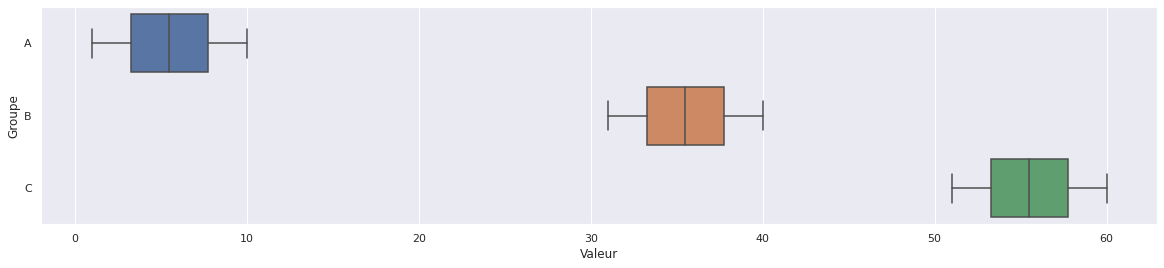

In [30]:
A = pd.Series(np.linspace(1,10,9), name='A')
B = pd.Series(np.linspace(31,40,9), name='B')
C = pd.Series(np.linspace(51,60,9), name='C')
Groupe = pd.Series(['A', 'B', 'C']).repeat(9).to_list()

frame = { 'Groupe': Groupe, 'Valeur': pd.concat([A, B, C]) } 
result = pd.DataFrame(frame) 
plt.subplots(figsize=(20,4))
ax = sns.boxplot(x="Valeur", y="Groupe", data=result)

On s'interesse au variance de chaque groupe

In [31]:
result.groupby("Groupe")['Valeur'].agg('var')

Groupe
A    9.492188
B    9.492188
C    9.492188
Name: Valeur, dtype: float64

Le test de bartlett permet de tester si les variances sont significativement différentes ou non

In [32]:
from scipy.stats import bartlett
bartlett(A, B, C)

BartlettResult(statistic=0.0, pvalue=1.0)

H0 : Les variances de chaque groupe sont égales si p-value > 5%
<br> ~H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%~
<br> On peut donc faire une ANOVA

In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

A travers l'analyse de la variance on cherche à déterminer si : <br>
H0 : Les moyennes de chaque groupe sont égales si p-value > 5%
<br> H1 : Les moyennes de chaque groupe ne sont pas toutes égales < 5%

In [34]:
model = ols('Valeur ~ Groupe', data=result).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Groupe,11400.0000,2.0,600.493827,3.198559e-21
Residual,227.8125,24.0,NaN,NaN


~H0 : Les moyennes de chaque groupe sont égales si p-value > 5%~
<br> H1 : Les moyennes de chaque groupe ne sont pas toutes égales < 5%

### Cas de variances inégales entre chaque groupe

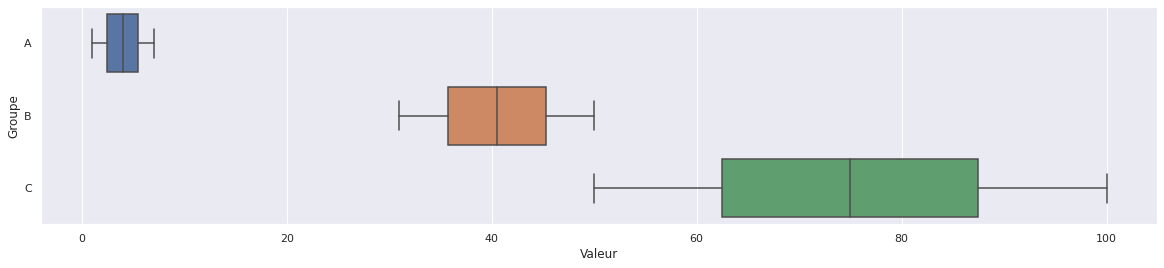

In [35]:
A = pd.Series(np.linspace(1,7,9), name='A')
B = pd.Series(np.linspace(31,50,9), name='B')
C = pd.Series(np.linspace(50,100,9), name='C')
Groupe = pd.Series(['A', 'B', 'C']).repeat(9).to_list()

frame = { 'Groupe': Groupe, 'Valeur': pd.concat([A, B, C]) } 
result = pd.DataFrame(frame) 
plt.subplots(figsize=(20,4))
ax = sns.boxplot(x="Valeur", y="Groupe", data=result)

In [36]:
bartlett(A, B, C)

BartlettResult(statistic=25.177363348990262, pvalue=3.410397602490597e-06)

~H0 : Les variances de chaque groupe sont égales si p-value > 5%~
<br> H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%
<br> Il n'est donc pas conseillé de réaliser une ANOVA car les résultats ne seraient pas fiables.

## Anova à 2 facteurs

Même principe que l'Anova à un facteur sauf qu'on ajoute un autre facteur. L'idée est de tester l'indépendance de ces facteurs sur une variable quantitative continue 

On utilise le dataset ToothGrowth disponible en [cliquant ici](). On étudie la longueur des odontoblastes (cellules responsables de la croissance dentaire) chez 60 cobayes. Chaque animal a reçu l'une des trois doses de vitamine C (0,5, 1 et 2 mg / jour) par l'une des deux méthodes d'administration, du jus d'orange ou de l'acide ascorbique (une forme de vitamine C et codée VC) :

* len : lLongueur de la dent
* supp : supplément (VC ou OJ).
* dose : dose en milligrammes / jour

In [42]:
df = pd.read_csv("../Dataset/ToothGrowth.csv")
df.head(3)

,len,supp,dose
0,4.2,VC,0.5
1,11.5,VC,0.5
2,7.3,VC,0.5


#### On étudie la variable supp

In [43]:
df.supp.unique()

array(['VC', 'OJ'], dtype=object)

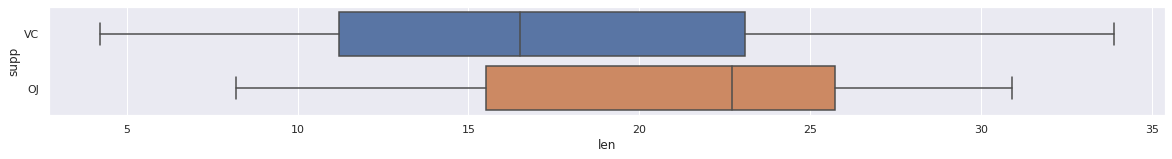

In [44]:
plt.subplots(figsize=(20,2))
ax = sns.boxplot(x="len", y="supp", data=df)

In [45]:
bartlett(df.len[df.supp == 'VC'],
        df.len[df.supp == 'OJ'])

BartlettResult(statistic=1.421682114943345, pvalue=0.23312673355220734)

H0 : Les variances de chaque groupe sont égales si p-value > 5%
<br> ~H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%~

#### On étudie la variable dose

In [46]:
df.dose.unique()

array([0.5, 1. , 2. ])

In [47]:
df.dose = df.dose.astype('category')

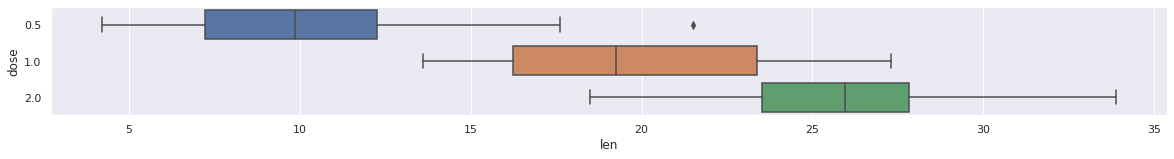

In [48]:
plt.subplots(figsize=(20,2))
ax = sns.boxplot(x="len", y="dose", data=df)

In [49]:
bartlett(df.len[df.dose == "0.5"],
        df.len[df.dose == "1.0"],
        df.len[df.dose == "2.0"])

BartlettResult(statistic=nan, pvalue=nan)

H0 : Les variances de chaque groupe sont égales si p-value > 5%
<br> ~H1 : Les variances de chaque groupe ne sont pas toutes égales < 5%~

#### On peut faire une ANOVA

H0 : Les moyennes de chaque groupe sont égales si p-value > 5%
<br> H1 : Les moyennes de chaque groupe ne sont pas toutes égales < 5%

In [50]:
model = ols('len ~ supp + dose', data=df).fit()

In [51]:
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
supp,205.350000,1.0,14.016638,4.292793e-04
dose,2426.434333,2.0,82.810935,1.871163e-17
Residual,820.425000,56.0,NaN,NaN


📢 Le principe de l'Anova à plusieurs facteurs c'est justement de pouvoir observer les intéractions entre les variables

In [52]:
model = ols('len ~ supp + dose + supp:dose', data=df).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
supp,205.350000,1.0,15.571979,2.311828e-04
dose,2426.434333,2.0,91.999965,4.046291e-18
supp:dose,108.319000,2.0,4.106991,2.186027e-02
Residual,712.106000,54.0,NaN,NaN


📢 On voit donc qu'il existe une intéraction entre les deux variables. Pour mesurer quelles associations sont significativement différentes des autres, on peut utilise un test de Tukey qui consiste à faire des tests de comparaison de moyenne sur deux échantillon avec toutes les combinaisons d'association

Pour cela, on crée une colonne avec les combinaisons des deux facteurs.

In [53]:
df['combinaison'] = df['supp'] + '-' + df['dose'].astype('str')
df.head(3)

,len,supp,dose,combinaison
0,4.2,VC,0.5,VC-0.5
1,11.5,VC,0.5,VC-0.5
2,7.3,VC,0.5,VC-0.5


In [54]:
import statsmodels.stats.multicomp as multi 
Results = multi.MultiComparison(df['len'], df['combinaison'])
Results = Results.tukeyhsd()
print(Results)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
OJ-0.5 OJ-1.0     9.47  0.001   4.6719  14.2681   True
OJ-0.5 OJ-2.0    12.83  0.001   8.0319  17.6281   True
OJ-0.5 VC-0.5    -5.25 0.0243 -10.0481  -0.4519   True
OJ-0.5 VC-1.0     3.54  0.264  -1.2581   8.3381  False
OJ-0.5 VC-2.0    12.91  0.001   8.1119  17.7081   True
OJ-1.0 OJ-2.0     3.36 0.3187  -1.4381   8.1581  False
OJ-1.0 VC-0.5   -14.72  0.001 -19.5181  -9.9219   True
OJ-1.0 VC-1.0    -5.93 0.0074 -10.7281  -1.1319   True
OJ-1.0 VC-2.0     3.44 0.2937  -1.3581   8.2381  False
OJ-2.0 VC-0.5   -18.08  0.001 -22.8781 -13.2819   True
OJ-2.0 VC-1.0    -9.29  0.001 -14.0881  -4.4919   True
OJ-2.0 VC-2.0     0.08    0.9  -4.7181   4.8781  False
VC-0.5 VC-1.0     8.79  0.001   3.9919  13.5881   True
VC-0.5 VC-2.0    18.16  0.001  13.3619  22.9581   True
VC-1.0 VC-2.0     9.37  0.001   4.5719  14.1681   True
----------